# Regression for The Boston Housing Dataset

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. **Hedonic prices and the demand for clean air**, J. Environ. Economics & Management, vol.5, 81-102, 1978.

This example runs using Python3

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [20, 10]

import pandas as pd  
import seaborn as sns 

%matplotlib inline

## Exploratory Data Analysis

In [7]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

The features (inputs) we have in this dataset:

* **CRIM:**  Per capita crime rate by town
* **ZN:**    Proportion of residential land zoned for lots over 25,000 sq. ft
* **INDUS:** Proportion of non-retail business acres per town
* **CHAS:**  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX:**   Nitric oxide concentration (parts per 10 million)
* **RM:**    Average number of rooms per dwelling
* **AGE:**   Proportion of owner-occupied units built prior to 1940
* **DIS:**   Weighted distances to five Boston employment centers
* **RAD:**   Index of accessibility to radial highways
* **TAX:**   Full-value property tax rate per 10,000 USD
* **PTRATIO:** Pupil-teacher ratio by town
* **LSTAT:** Percentage of lower status of the population

And our target value (output):

* **MEDV: Median value of owner-occupied homes in 1000s USD** 

In [9]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) #convert data into pandas DataFrame
boston['MEDV'] = boston_dataset.target
boston.head(5) #prints the first 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Correlation

+ Next, we create a correlation matrix that measures the linear relationships between the variables. 
+ The correlation matrix can be formed by using the corr function from the pandas dataframe library. 
+ We will use the heatmap function from the seaborn library to plot the correlation matrix.

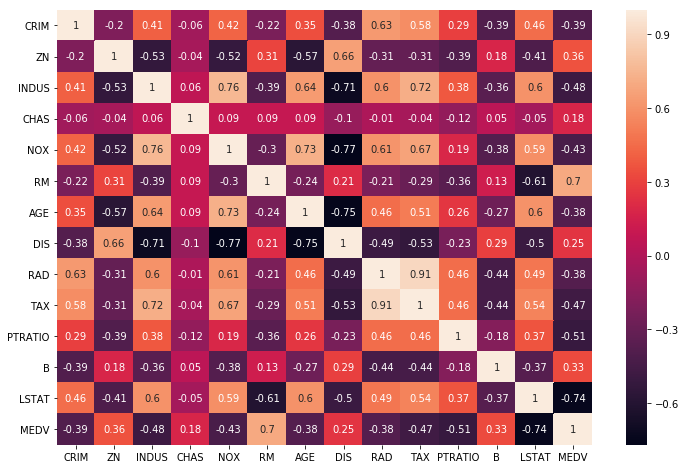

In [18]:
correlation_matrix = boston.corr().round(2) #computes the correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True) #plot the correlations in a heatmap

+ The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.
+ Based on the above observations we can choose **RM** and **LSTAT** as our features. Using a scatter plot let’s see how these features vary with MEDV.

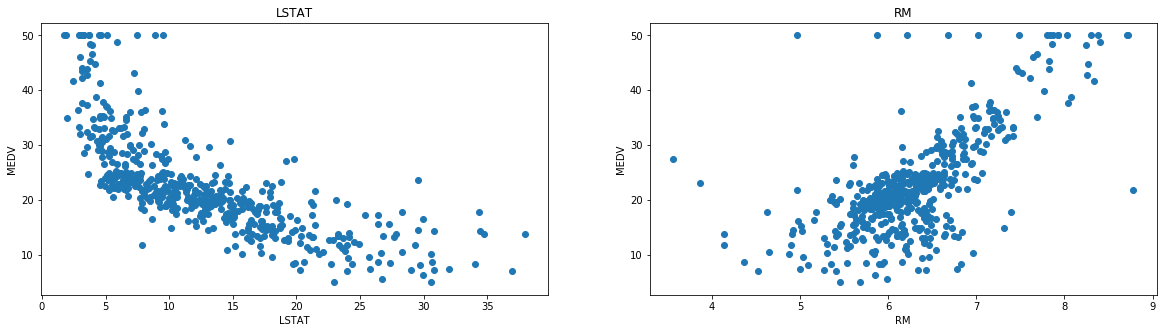

In [19]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [20]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

## Splitting the data into training and testing sets

+ After we have trained our model, we should test it using examples that are unknown (i.e. were not used during the training process). 
+ This helps identifying overfitting.
+ In this example we will use 80% of the data for training and 20% for testing.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print('Input train dimensions:', X_train.shape)
print('Input test dimensions:',X_test.shape)
print('Output train dimensions:',Y_train.shape)
print('Output test dimensions:',Y_test.shape)

Input train dimensions: (404, 2)
Input test dimensions: (102, 2)
Output train dimensions: (404,)
Output test dimensions: (102,)


# Training and testing the model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()  #our model is a linear regression
lin_model.fit(X_train, Y_train) #train our model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
